In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import re
import json

In [2]:
from modules.document_processing import DataFrameGraphProcessing, GraphBuilder
from modules.etl import DocumentOpener, GMLReader

In [17]:
fp = './data/tweets.csv'
# fp = './data/tweets.xlsx'
# fp = './data/les_miserables.json'
# fp = './data/cpan-authors.gexf'

p = DocumentOpener(filepath=fp, source = "handle", sink = "original_author")

In [18]:
# fp = './data/lesmiserables.gml'
# p = DocumentOpener(filepath=fp)

In [19]:
# p = DocumentGraphProcessing(fp,'handle', 'original_author', min_deg = 1)

In [20]:
p.FILEPATH

'./data/tweets.csv'

In [21]:
p.df

,id,handle,text,is_retweet,original_author,time,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,is_quote_status,...,place_type,place_country_code,place_country,place_contained_within,place_attributes,place_bounding_box,source_url,truncated,entities,extended_entities
0,780925634159796224,HillaryClinton,The question in this election: Who can put the...,False,NaN,2016-09-28T00:22:34,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,https://studio.twitter.com,False,{'media': [{'display_url': 'pic.twitter.com/Xr...,{'media': [{'display_url': 'pic.twitter.com/Xr...
1,780916180899037184,HillaryClinton,"Last night, Donald Trump said not paying taxes...",True,timkaine,2016-09-27T23:45:00,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,http://twitter.com,False,{'media': [{'display_url': 'pic.twitter.com/t0...,{'media': [{'display_url': 'pic.twitter.com/t0...
2,780911564857761793,HillaryClinton,Couldn't be more proud of @HillaryClinton. Her...,True,POTUS,2016-09-27T23:26:40,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,https://about.twitter.com/products/tweetdeck,False,"{'user_mentions': [{'id_str': '1536791610', 'n...",NaN
3,780907038650068994,HillaryClinton,"If we stand together, there's nothing we can't...",False,NaN,2016-09-27T23:08:41,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,https://studio.twitter.com,False,{'media': [{'display_url': 'pic.twitter.com/Q3...,{'media': [{'display_url': 'pic.twitter.com/Q3...
4,780897419462602752,HillaryClinton,Both candidates were asked about how they'd co...,False,NaN,2016-09-27T22:30:27,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,https://about.twitter.com/products/tweetdeck,False,"{'user_mentions': [], 'symbols': [], 'urls': [...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6439,684219579548041218,realDonaldTrump,"""@lilredfrmkokomo: @realDonaldTrump My Faceboo...",False,NaN,2016-01-05T03:47:14,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,http://twitter.com/download/android,False,"{'user_mentions': [{'id_str': '26122621', 'nam...",NaN
6440,684218836569206784,realDonaldTrump,"""@marybnall01: @realDonaldTrump watched lowell...",False,NaN,2016-01-05T03:44:17,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,http://twitter.com/download/android,False,"{'user_mentions': [{'id_str': '3477455725', 'n...",NaN
6441,684218305100525569,realDonaldTrump,"""@ghosthunter_lol: Iowa key endorsement for @r...",False,NaN,2016-01-05T03:42:10,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,http://twitter.com/download/android,False,{'media': [{'display_url': 'pic.twitter.com/JB...,{'media': [{'display_url': 'pic.twitter.com/JB...
6442,684217554861199360,realDonaldTrump,"""@iLoveiDevices: @EdwinRo47796972 @happyjack22...",False,NaN,2016-01-05T03:39:11,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,http://twitter.com/download/android,False,"{'user_mentions': [{'id_str': '42568997', 'nam...",NaN


In [22]:
p.file_ext

'csv'

In [23]:
p.NODELIST

,id,label
0,0,JoeBiden
1,1,MalalaFund
2,2,RachaelGass
3,3,texasinafrica
4,4,kylegriffin1
...,...,...
273,273,LSD_Esq
274,274,robertjeffress
275,275,ChelseaClinton
276,276,RepRubenGallego


In [24]:
p.EDGELIST

,handle,original_author
1,176,164
2,176,116
9,176,101
10,176,146
11,60,263
...,...,...
6249,60,145
6258,60,224
6310,60,88
6330,60,245


## Graphbuilder

In [25]:
gb = GraphBuilder(p, min_deg = 2)
gb.build_graph()

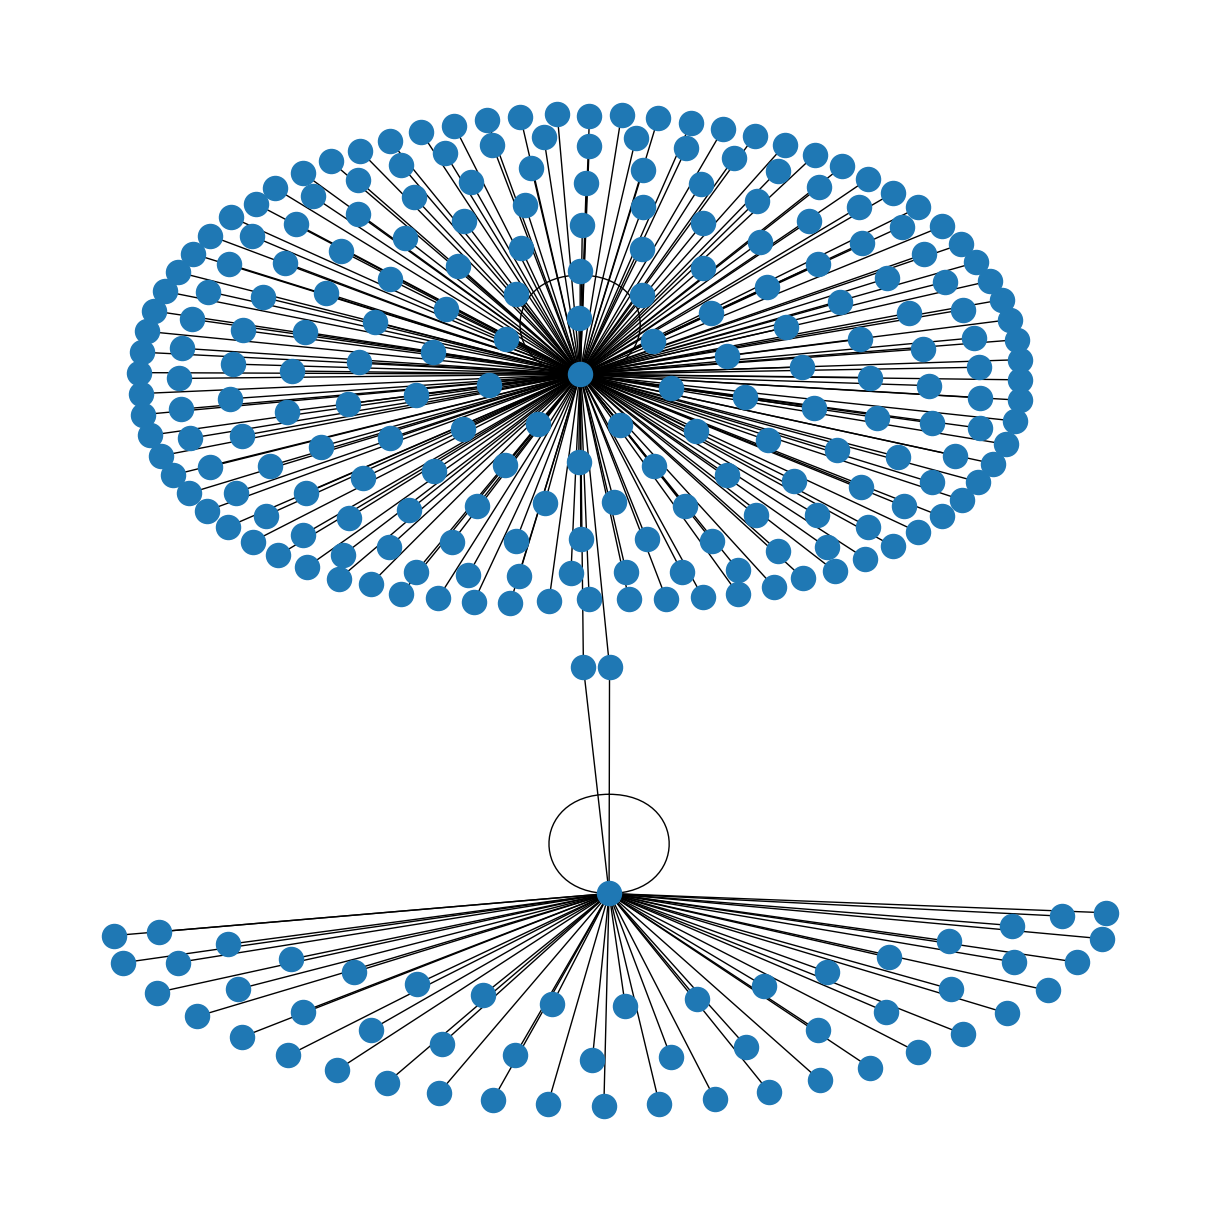

In [26]:
gb.draw()

In [27]:
gb.calculate_centrality()
gb.centrality

,degree,closeness,betweenness,eigenvector,degree_nonnormal
0,0.00361,0.420973,0.0,0.046444,1
1,0.00361,0.420973,0.0,0.046444,1
2,0.00361,0.420973,0.0,0.046444,1
3,0.00361,0.420973,0.0,0.046444,1
4,0.00361,0.420973,0.0,0.046444,1
...,...,...,...,...,...
273,0.00361,0.420973,0.0,0.046444,1
274,0.00361,0.277555,0.0,0.000546,1
275,0.00361,0.420973,0.0,0.046444,1
276,0.00361,0.420973,0.0,0.046444,1


In [28]:
gb.filter_graph_degree()

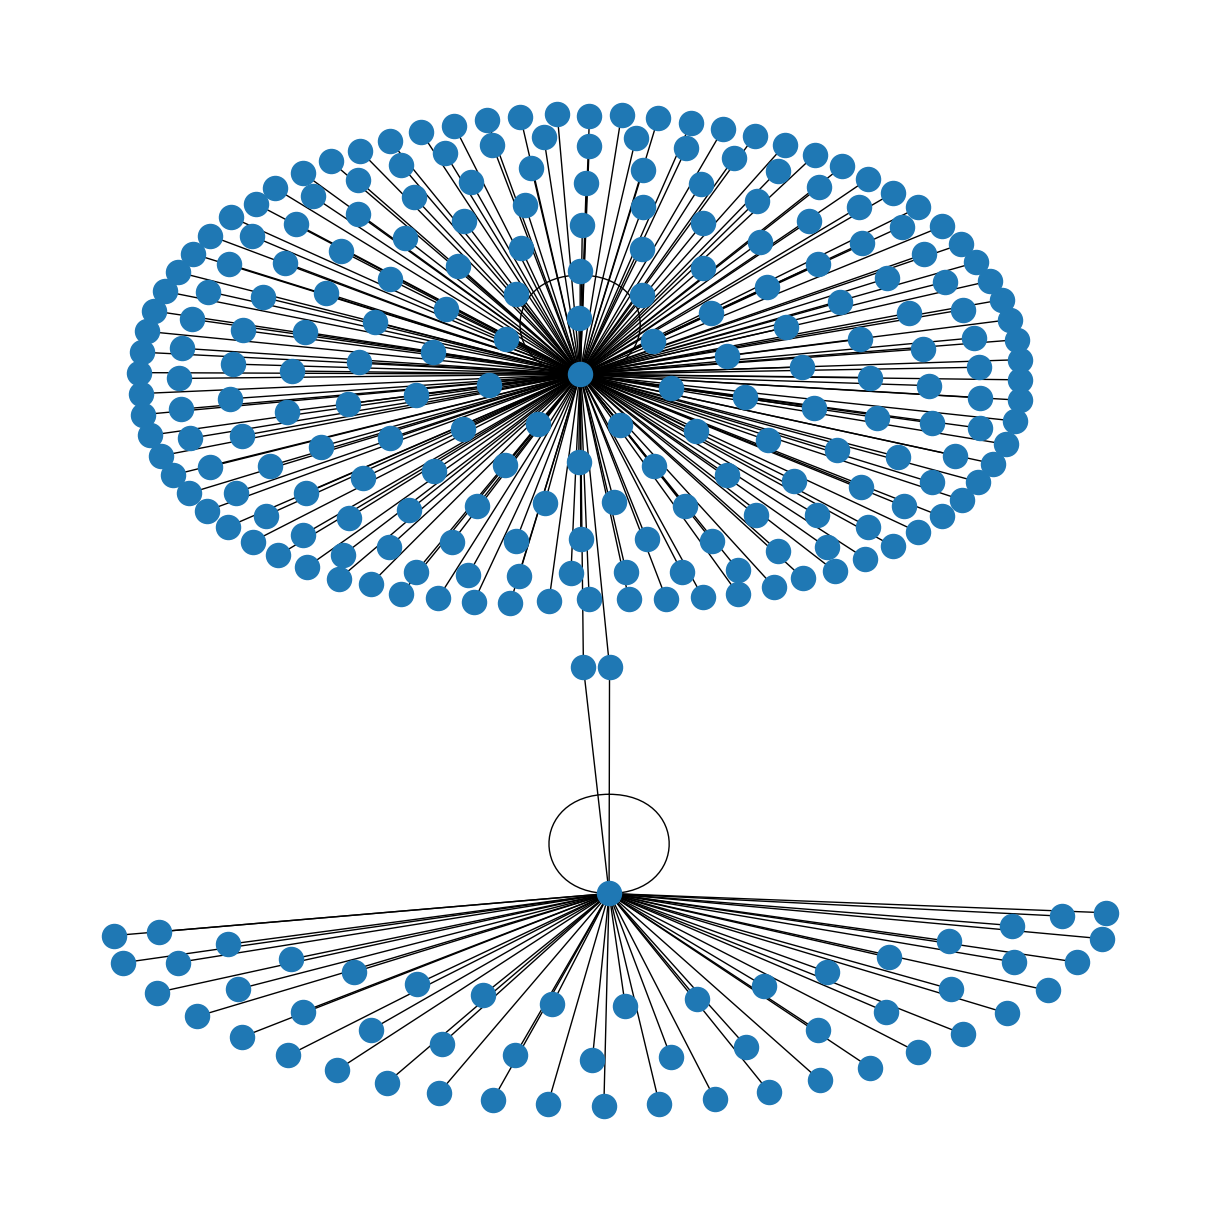

In [31]:
gb.draw(scope='full')

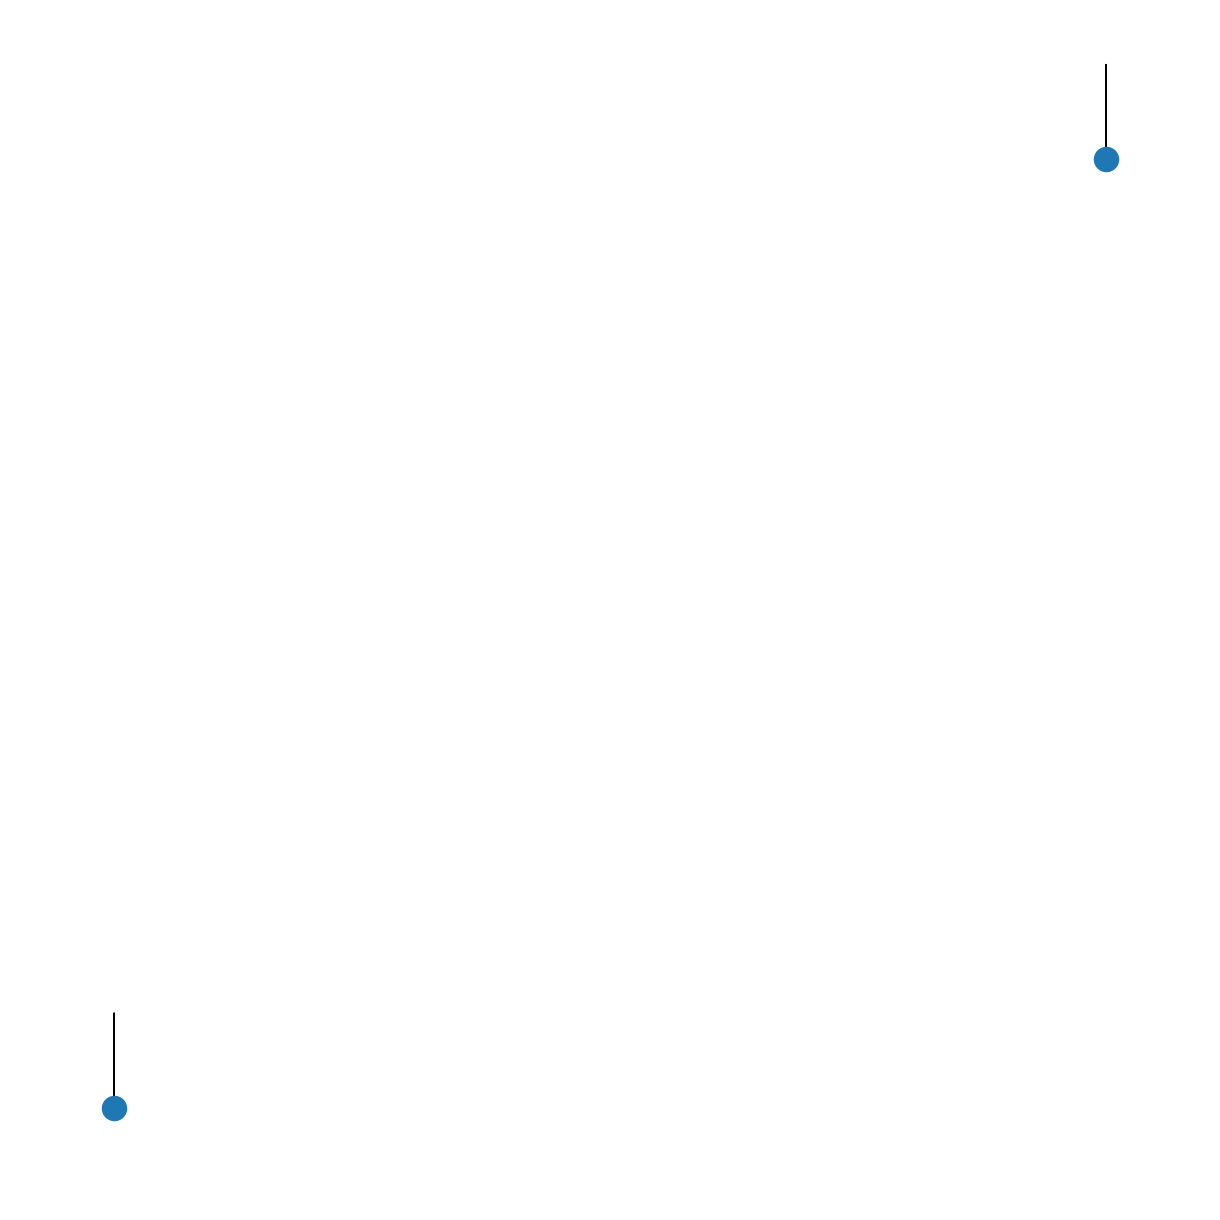

In [30]:
gb.draw(scope='subgraph')

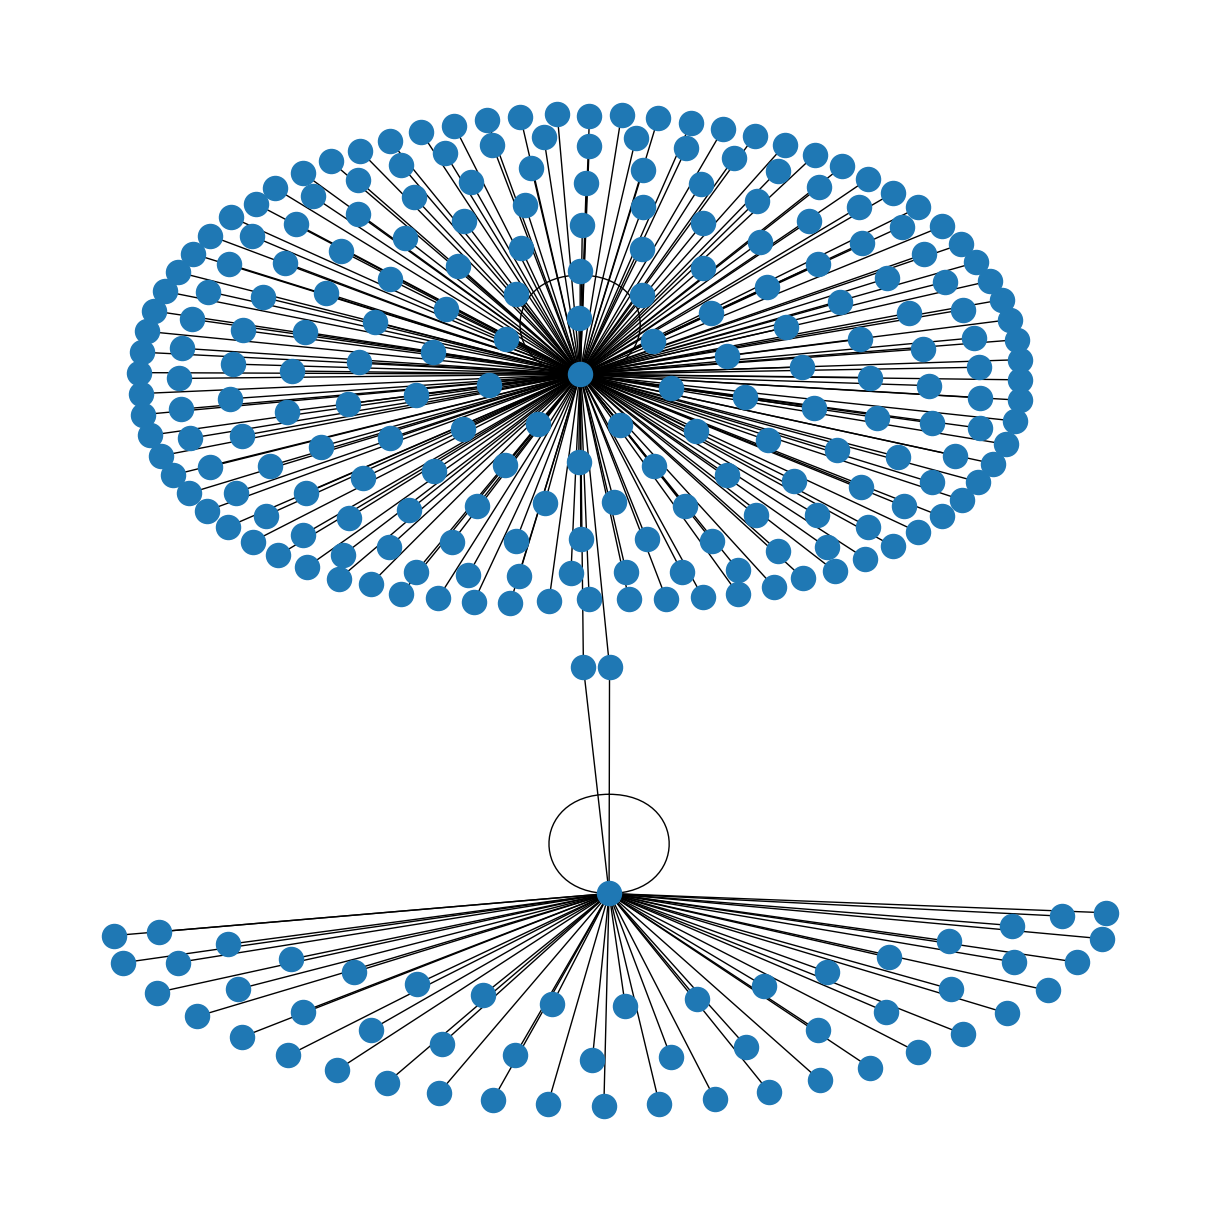

In [32]:
gb.save_graph(filename = 'myfile')